In [1]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# The "Career Statistics" table (https://www.learnedleague.com/profiles.php?22422&2)
# copies out as tab-separated values, which makes things easy (saved in data.txt).

In [3]:
# Seasons in Rundle E
!cat data.txt | grep Div | grep E | cut -f1 | cut -c3-4 | tail -r | paste -sd, -

71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86


In [4]:
# Rundle E TCA (Total Correct Answers)
!cat data.txt | grep Div | grep E | cut -f8 | tail -r | paste -sd, -

46,53,42,34,43,51,44,39,39,45,51,43,44,37,49,66


In [5]:
# Rundle E CAA (Correct Answers 'Allowed' meaning how many my opponents got)
!cat data.txt | grep Div | grep E | cut -f10 | tail -r | paste -sd, -

46,54,49,40,50,52,40,47,51,51,46,39,38,46,48,48


In [6]:
seasons = [71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86]
tca = [46,53,42,34,43,51,44,39,39,45,51,43,44,37,49,66]
caa = [46,54,49,40,50,52,40,47,51,51,46,39,38,46,48,48]
cadiff = [me - opp for me, opp in zip(tca, caa)]

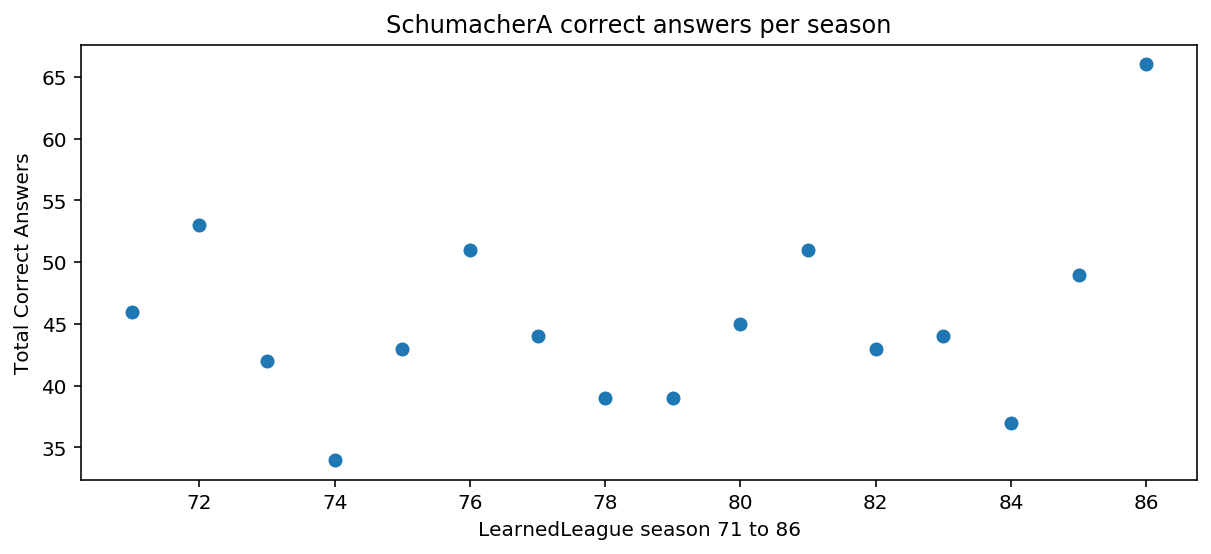

In [7]:
plt.figure(figsize=(10, 4))
plt.plot(seasons, tca, 'o')
plt.xlabel('LearnedLeague season 71 to 86')
plt.ylabel('Total Correct Answers')
plt.title('SchumacherA correct answers per season')
plt.savefig('tca_small.png', dpi=64)  # Used in LL message board...
plt.savefig('tca.png', dpi=80)

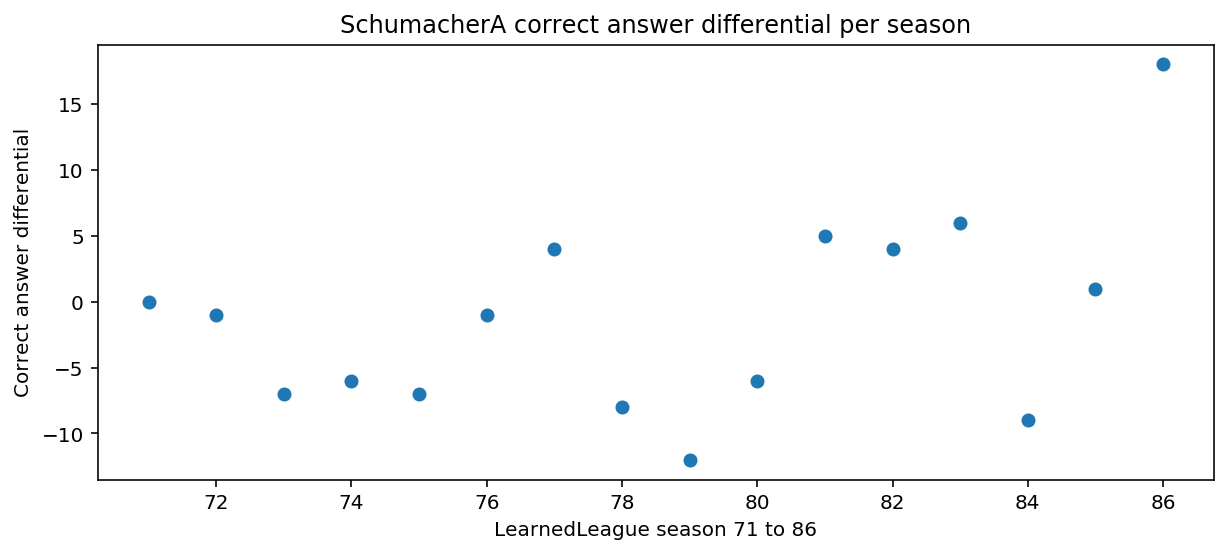

In [8]:
plt.figure(figsize=(10, 4))
plt.plot(seasons, cadiff, 'o')
plt.xlabel('LearnedLeague season 71 to 86')
plt.ylabel('Correct answer differential')
plt.title('SchumacherA correct answer differential per season')
plt.savefig('cadiff.png', dpi=80)

In [14]:
mean = np.mean(tca[:-1])
std = np.std(tca[:-1])
p = 1 - scipy.stats.norm(loc=mean, scale=std).cdf(tca[-1])

(mean, std, tca[-1], (tca[-1] - mean) / std, p,
 1 - scipy.stats.t(14, loc=mean, scale=std).cdf(tca[-1]))

(44.0,
 5.253570214625479,
 66,
 4.187628431947846,
 1.4094225593619392e-05,
 0.000456114014737552)

In [13]:
mean = np.mean(cadiff[:-1])
std = np.std(cadiff[:-1])
p = 1 - scipy.stats.norm(loc=mean, scale=std).cdf(cadiff[-1])

(mean, std, cadiff[-1], (cadiff[-1] - mean) / std, p,
 1 - scipy.stats.t(14, loc=mean, scale=std).cdf(cadiff[-1]))

(-2.466666666666667,
 5.560175856531479,
 18,
 3.6809387319332165,
 0.00011618842151439601,
 0.0012343874109264075)

In [11]:
len(cadiff)

16

In [12]:
1 - scipy.stats.t(14, loc=mean, scale=std).cdf(cadiff[-1])

0.0012343874109264075